# Example 6 - Modelling of a chirpIDT

This example includes:
- modelling of frequency response using delta-function model
- modelling of time response using impulse-response model
- prediction of the SAW shape for an given input singal
- prediction of the measured signal taking into account a detector IDT

## Imports

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from idtpy import model

## Model for exponential chirp IDT

In [3]:
print(model.ExpChirp.__doc__)


    Model for exponential chirp IDT
    In an exponential chirp IDT, the frequency is uniformly increasing (i.e. f_n - f_{n+1} is constant).
    This leads to an exponential dependency of the frequency modulation f(t) with respect to time t.

    Args:
        fmin (float): initial frequency
        fmax (float): final frequency
        T (float): length in time. Equivalent to SAW travelling time to cross the IDT from end to end
        phi0 (float): phase offset
        t0 (float): time offset
    


### Frequency response

<IPython.core.display.Javascript object>


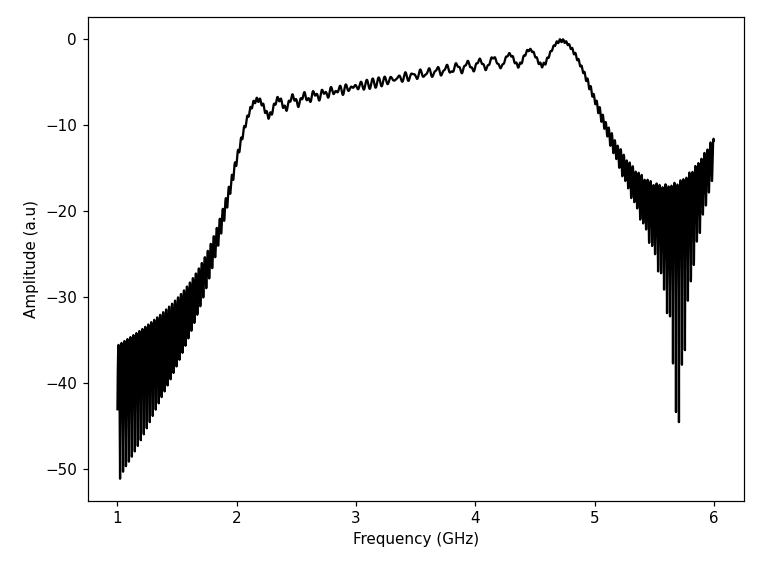

In [4]:
freq = np.arange(1, 6, 0.001)

idt = model.ExpChirp(fmin=2,fmax=5,T=40,phi0=0,t0=0)
f_res = idt.freq_response(freq, apodized=False, db=True, shp=1).real

plt.close('all')
fig, ax = plt.subplots(1)
ax.plot(freq, f_res, 'k')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Amplitude (a.u)')
fig.tight_layout()

### Time response

This is the equivalent waveform of an IDT

<IPython.core.display.Javascript object>


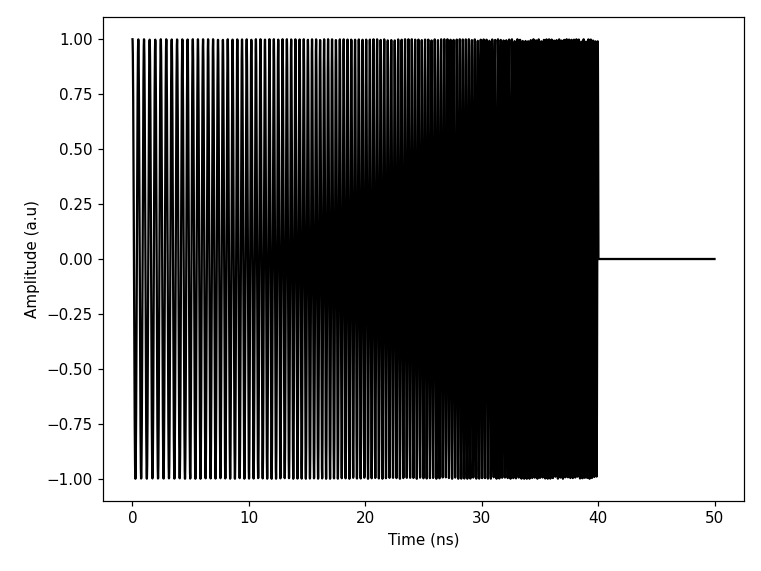

In [5]:
time = np.arange(0, 50, 0.01)
t_res = idt.time_response(time).real

plt.close('all')
fig, ax = plt.subplots(1)
ax.plot(time, t_res, 'k')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u)')
fig.tight_layout()

### Apply an input signal for maximal pulse compression

#### Method 1

<IPython.core.display.Javascript object>


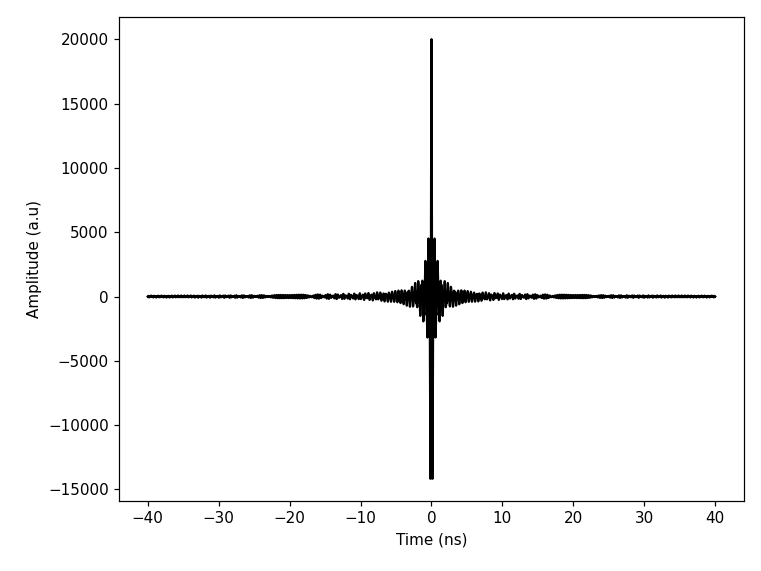

In [13]:
dt = 0.001
time, t_res = idt.ideal_compression(dt=dt,centered=True)

plt.close('all')
fig, ax = plt.subplots(1)
ax.plot(time, t_res, 'k')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u)')
fig.tight_layout()

#### Method 2

<IPython.core.display.Javascript object>


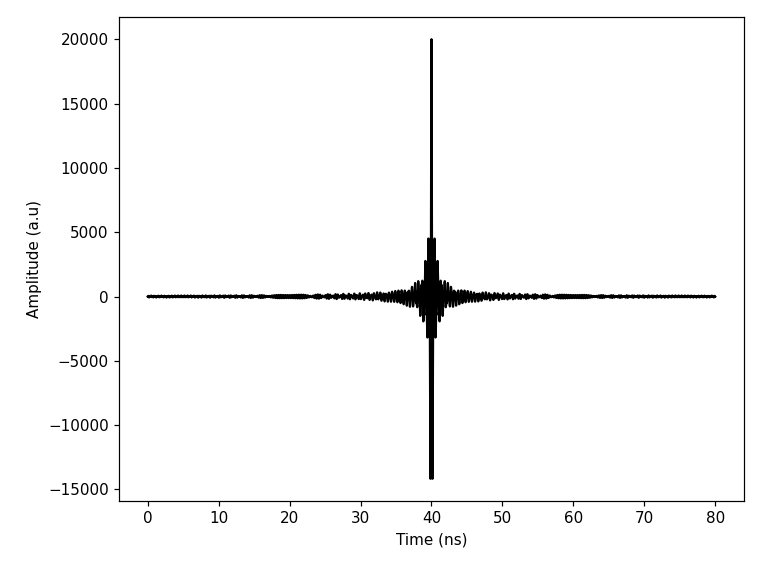

In [8]:
dt = 0.001
input_signal = idt.copy()
ideal_wf = idt.apply_waveform(input_signal, dt)

time = np.arange(0, 80, dt)
t_res = ideal_wf.time_response(time).real

plt.close('all')
fig, ax = plt.subplots(1)
ax.plot(time, t_res, 'k')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u)')
fig.tight_layout()

### Apply non-ideal signals for compression

<IPython.core.display.Javascript object>


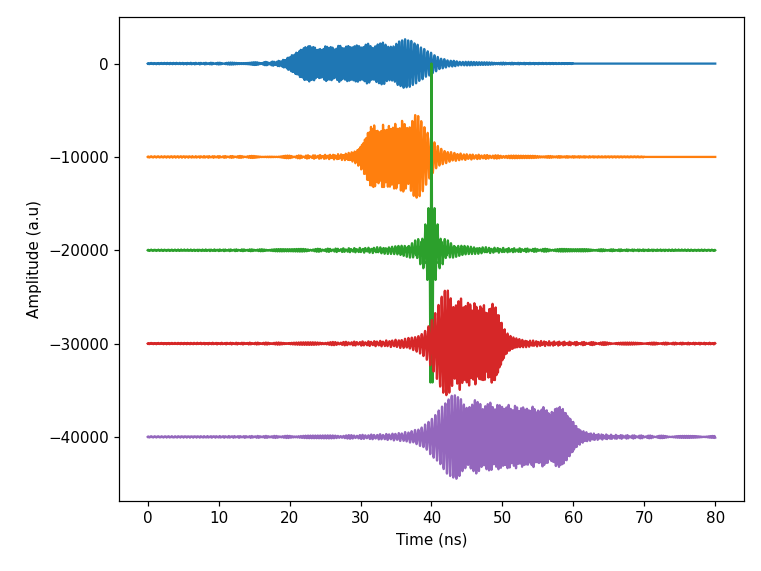

In [22]:
dt = 0.001
idt = model.ExpChirp(
    fmin=2,
    fmax=5,
    T=40,
    )

plt.close('all')
fig, ax = plt.subplots(1)
for i, Ti in enumerate([20,30,40,50,60]):
    input_signal = model.ExpChirp(
        fmin=2,
        fmax=5,
        T=Ti, # shorter
    )
    ideal_wf = idt.apply_waveform(input_signal, dt)
    time = np.arange(0, 80, dt)
    t_res = ideal_wf.time_response(time).real
    y_offset = i*-1e4
    ax.plot(time, t_res + y_offset, label=Ti)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u)')
fig.tight_layout()

### Convolute SAW shape with the response of an detector IDT

<IPython.core.display.Javascript object>


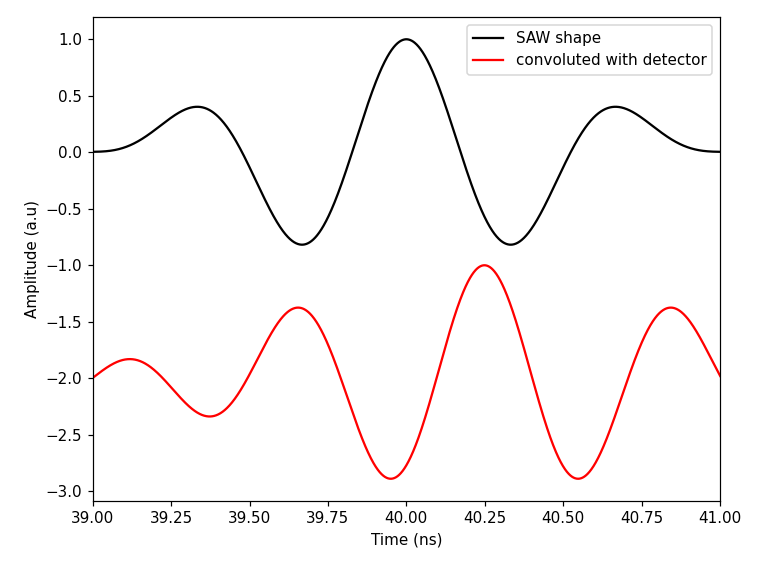

In [34]:
dt = 0.001
time = np.arange(0, 80, dt)
idt = model.ExpChirp(
    fmin=1,
    fmax=,
    T=40,
    )
input_signal = idt.copy()
det_idt = model.Regular(
    f=3,
    T=1.5/3, # 1.5 period
    phi0=np.pi/2,
)
ideal_wf = idt.apply_waveform(input_signal, dt)
det_wf = ideal_wf.apply_waveform(det_idt, dt)

ideal_res = ideal_wf.time_response(time).real
det_res = det_wf.time_response(time).real

ideal_res = ideal_res/np.max(ideal_res)
det_res = det_res/np.max(det_res)

plt.close('all')
fig, ax = plt.subplots(1)
ax.plot(time, ideal_res, 'k', label='SAW shape')
ax.plot(time, det_res - 2, 'r', label='convoluted with detector')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u)')
ax.set_xlim(39,41)
ax.legend()
fig.tight_layout()